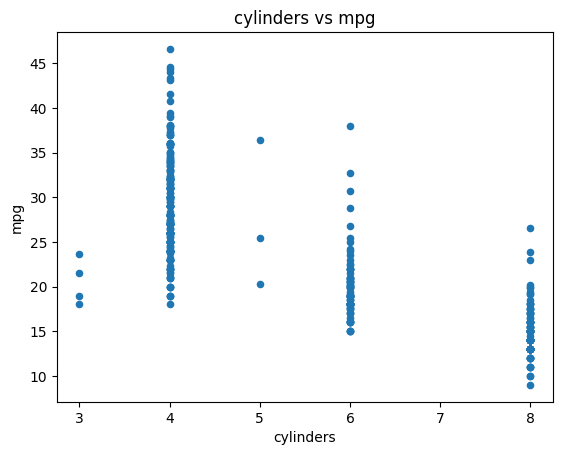

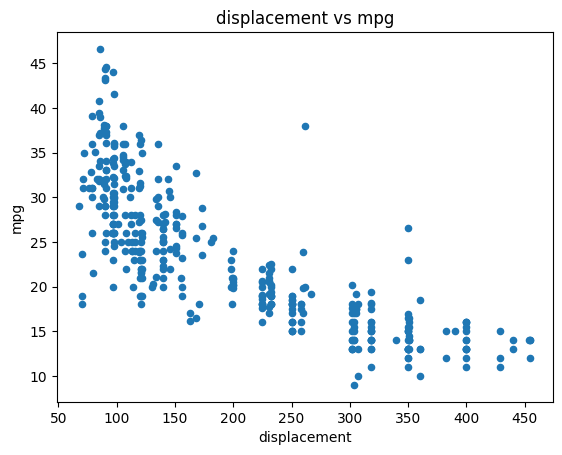

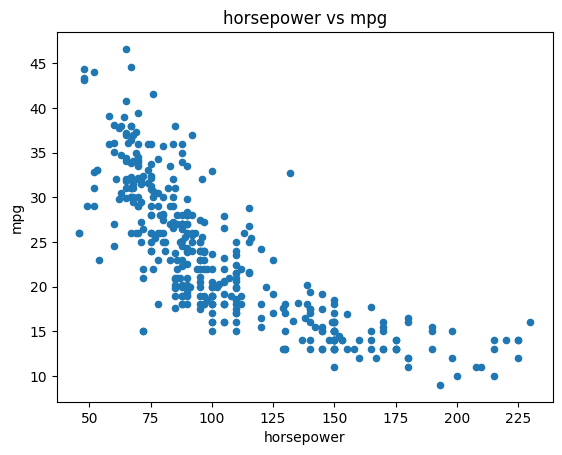

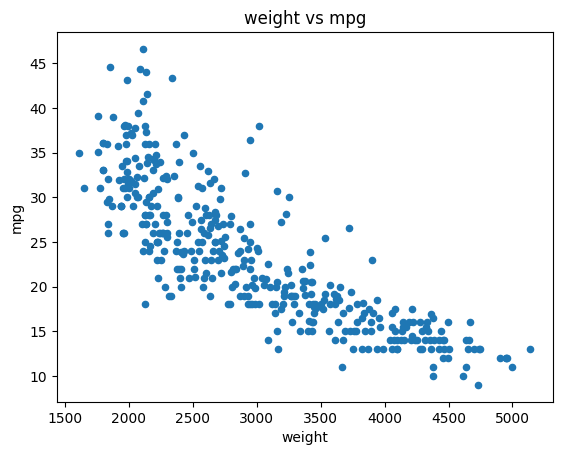

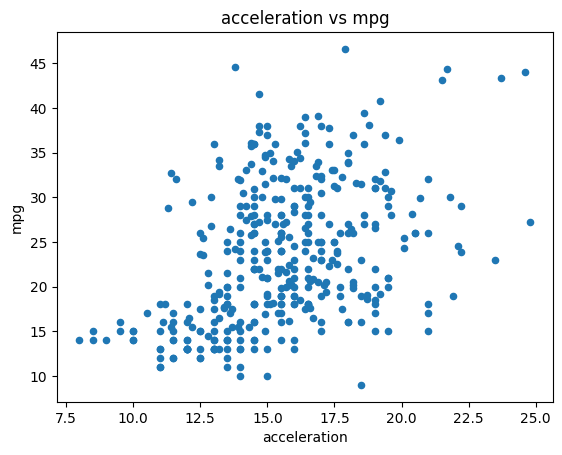

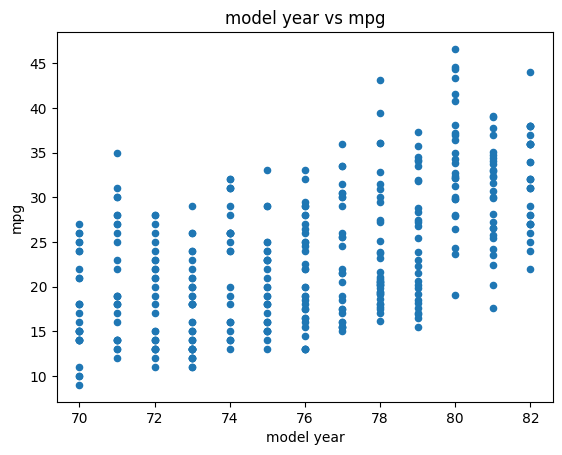

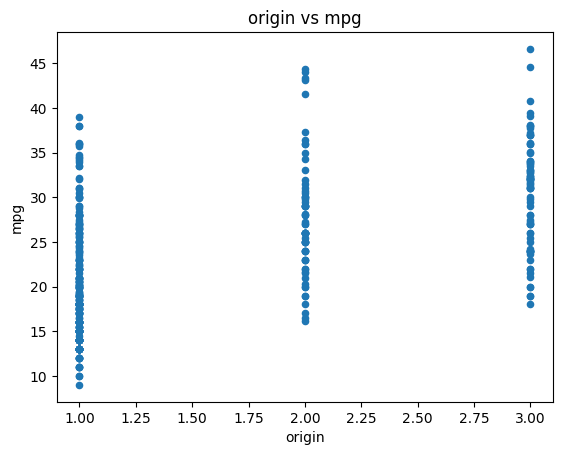

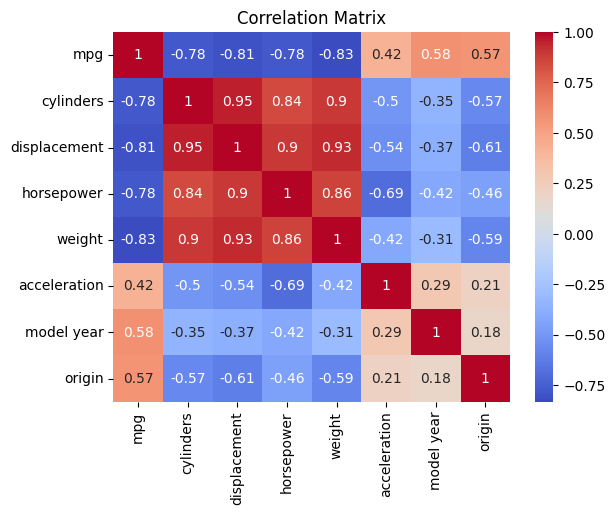

Train Set: (294, 19)
Test Set: (98, 19)
Intercept: 34.15038578841295
Coefficients: [ 4.75491031e-03 -3.77484488e-02 -5.32097436e-03  6.27072914e+00
  6.57017279e+00  3.56549565e+00  6.04201148e+00  7.55359799e-01
 -8.78950922e-01 -1.11191466e+00  1.38078383e+00  8.37424221e-01
  1.23803725e+00  2.56403035e+00  2.76908254e+00  4.28106362e+00
  9.68193025e+00  6.69870883e+00  7.36875680e+00]
Mean Absolute Error: 1.5914
Mean Absolute Percentage Error: 0.0786
Mean Squared Error: 5.292
Root Mean Squared Error: 2.3004
R2 Score: 0.8771


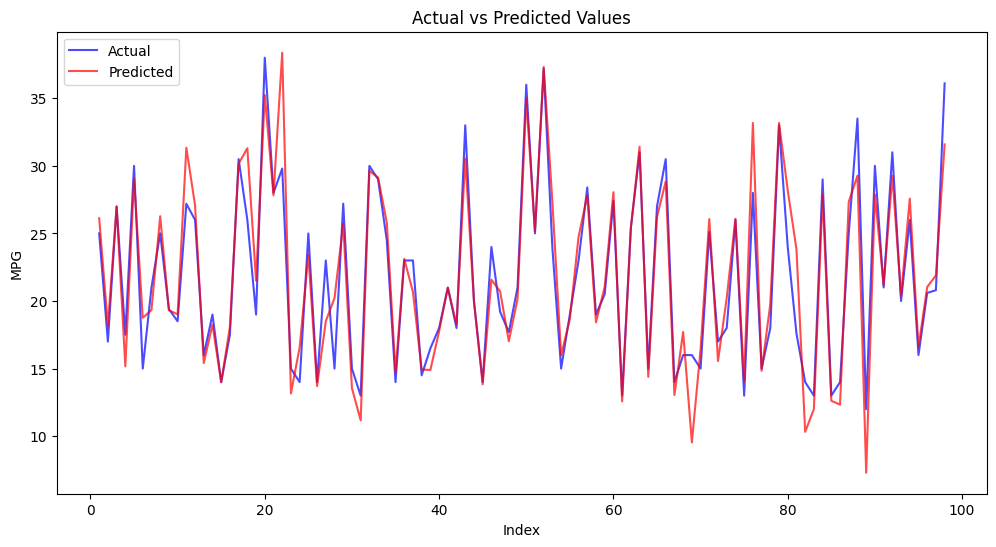

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('auto-mpg.csv')

# Data Preprocessing
# Replace '?' with NaN and drop rows with missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Drop irrelevant columns
data.drop(['car name'], axis=1, inplace=True)

# Convert 'horsepower' to numeric
data['horsepower'] = pd.to_numeric(data['horsepower'])

# Define target and features
target = 'mpg'
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Data Visualization
# Scatter plots for each feature vs target
for feature in features:
    data.plot(x=feature, y=target, kind='scatter', title=f'{feature} vs {target}')
    plt.show()

# Correlation matrix
correlation_matrix = data.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Drop less impactful columns based on correlation
# (Assuming 'origin' and 'acceleration' are less impactful as per the sample)
data.drop(['origin', 'acceleration'], axis=1, inplace=True)

# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['cylinders', 'model year'], drop_first=True)

# Define new feature set
new_features = [col for col in data.columns if col != target]

# Prepare the data for training
X = data[new_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Size of the Train and Test datasets
print('Train Set:', X_train.shape)
print('Test Set:', X_test.shape)

# Model Building: Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = round(mean_absolute_error(y_test, y_pred), 4)
mape = round(mean_absolute_percentage_error(y_test, y_pred), 4)
mse = round(mean_squared_error(y_test, y_pred), 4)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)
r_squared = round(r2_score(y_test, y_pred), 4)

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r_squared)

# Visualization of Actual vs Predicted Values
c = [i for i in range(1, len(y_test)+1)]
plt.figure(figsize=(12, 6))
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", alpha=0.7, label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", alpha=0.7, label="Predicted")
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('MPG')
plt.legend()
plt.show()